# Les K plus proches voisins & Arbres de décision 

## Partie I: K plus proches voisins (KNN : k nearest neighbors)

## A. Algorithme
Le KNN est un algorithme de classification supervisé. Pour chaque entrée $x_{i}=(x^{1}_{i}, x^{1}_{i}, x^{2}_{i}, ... x^{n}_{i}) $ il faut disposer de la sortie $y_{i}$ correspondante (la classe correspondante)

Pour savoir à quelle classe $y_{i}$ un vecteur x apartient il faut:
- Calculer la distance (euclidienne) du vecteur x à tous les examples $x_{i}$
- trouver les k exemple les plus proche de x
- x appartient à la classe majoritairement representé par ces k éléments 

#### Q1. utilisez la fonction ***make_blobs(n_samples,centers, cluster_std,random_state)*** du module ***sklearn.datasets*** pour generer trois classes puis visualiser ces trois classe comme suivants:
*   rouge: y=0
*   blue: y=1
*   vert: y=2
*   Orange: y=3
l'argument ***cluster_std*** affecte le chevauchement entre les classe

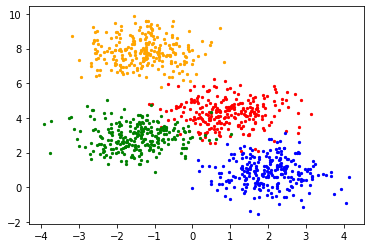

In [1]:
#modules
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

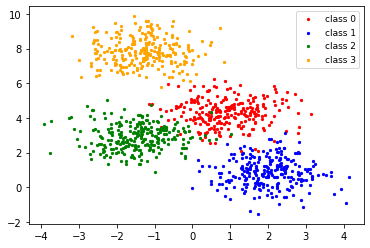

In [2]:
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.8, n_features=2,random_state=0)

def plot_blobs(X,y):
    #plt.figure( figsize=(7, 5))
    plt.scatter(X[np.where(y == 0),0], X[np.where(y == 0),1],s=5,color='r',label="class 0")
    plt.scatter(X[np.where(y == 1),0], X[np.where(y == 1),1],s=5,color='b',label="class 1")
    plt.scatter(X[np.where(y == 2),0], X[np.where(y == 2),1],s=5,color='g',label="class 2")
    plt.scatter(X[np.where(y == 3),0], X[np.where(y == 3),1],s=5,color='orange',label="class 3")
    plt.legend(loc=0, prop={'size': 9})

plot_blobs(X,y)
plt.show()



#### Q2. Ecrire une fonction knn(x,X_train,y_train,k) pour predire la classe de x avec l'algorithme du kNN 

In [3]:
def dist_euc(X,x1):
    return np.sum((X - np.array([x1]) )*(X - np.array([x1]) ),axis=1)
    #return np.sum((np.array([x1]) - X)*(np.array([x1]) - X),axis=1)

def knn(x,X_train,y_train,k):
    D = { 
        'x':np.full_like(X_train[:,0],x[0]),
        'y':np.full_like(X_train[:,1],x[1]),
        'X':X_train[:,0],
        'Y':X_train[:,1],
        'label':y_train,
        'distance': dist_euc(X_train,x)
    }
    df = pd.DataFrame(data=D)
    df.sort_values(by=['distance'] , ascending=True,inplace = True)
    return df.head(k)

new_x = [0,4]

def get_knn(new_x,X,y,k):
    df = knn(new_x,X,y,k)
    new_x_label = df["label"].value_counts().index.tolist()[0]
    print("the label of new_x({},{}) for k = {} is {}.".format(new_x[0],new_x[1],k,new_x_label))
    return new_x_label
    

label = get_knn(new_x,X,y,10)

the label of new_x(0,4) for k = 10 is 0.


In [14]:
#knn(new_x,X,y,10)

,x,y,X,Y,label,distance
57,0.0,4.0,0.050386,4.053954,0,0.005450
41,0.0,4.0,0.058295,3.953531,0,0.005558
649,0.0,4.0,-0.076456,3.934520,0,0.010133
407,0.0,4.0,0.025183,3.898334,0,0.010970
567,0.0,4.0,0.152322,4.023833,0,0.023770
...,...,...,...,...,...,...
645,0.0,4.0,0.605393,4.688973,0,0.841184
918,0.0,4.0,0.364955,3.153554,0,0.849663
927,0.0,4.0,0.897508,3.773005,0,0.857048
811,0.0,4.0,-0.025966,4.925780,0,0.857742


#### Q3. A quelle classe apartient les trois points suivants: x1=(-2,5); x2(-1,6) et x3=(0,2) pour k=3,5 et 7 respectivement

In [5]:
x1 = [-2,5]
x2 = [-1,6]
x3 = [0,2]

ks = [3,5,7]

def knns(x,X_train,y_train,ks):
    D = {}
    for i in range(len(ks)):
        D['k'+str(ks[i])] = get_knn(x,X_train,y_train,ks[i])
    print("__________________________________________")
    return D
    
x1_labels = knns(x1,X,y,ks)
x2_labels = knns(x2,X,y,ks)
x3_labels = knns(x3,X,y,ks)

the label of new_x(-2,5) for k = 3 is 2.
the label of new_x(-2,5) for k = 5 is 2.
the label of new_x(-2,5) for k = 7 is 2.
__________________________________________
the label of new_x(-1,6) for k = 3 is 3.
the label of new_x(-1,6) for k = 5 is 3.
the label of new_x(-1,6) for k = 7 is 3.
__________________________________________
the label of new_x(0,2) for k = 3 is 2.
the label of new_x(0,2) for k = 5 is 2.
the label of new_x(0,2) for k = 7 is 2.
__________________________________________


## B. Utilisation des modules python
Le module ***KNeighborsClassifier*** de ***sklearn.neighbors*** permet de initialiser un modele kNN avec un parametre k ***KNeighborsClassifier(k)*** en entraine ce modele avce la sa méthode ***fit(x_train,y_train)*** puis la prediction avec sa methode ***predict(x)***
#### Q1. Utiliser 75% des données precedentes pour entrainer ce modèle puis afficher la matrice de confusion et la precision de ce modèle pour k=1, 3, 5 ... 11
Utiliser la méthode accuracy_score(y_test, y_pred) de sklearn.metrics pour calculer la precision (accuracy) du modèle

In [6]:
#split data 75% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#model training
accuracys = []
cms = []
for i in range(1,13,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    accuracys.append(accuracy_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))


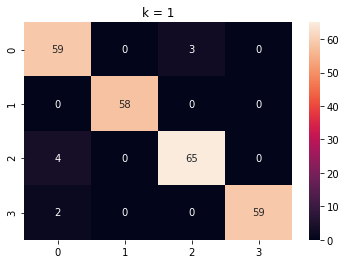

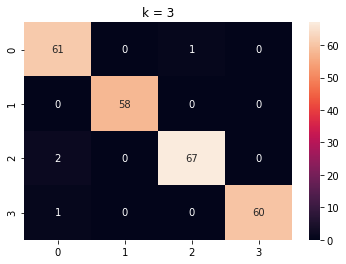

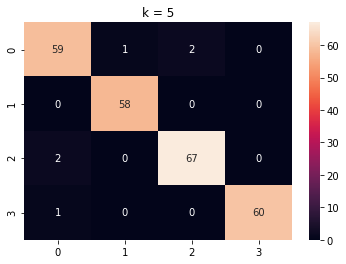

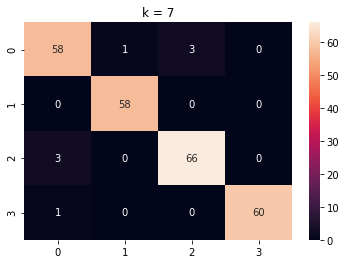

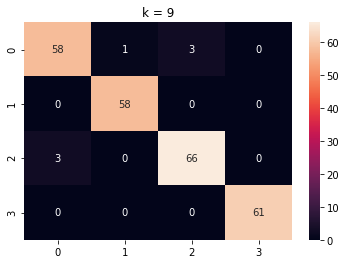

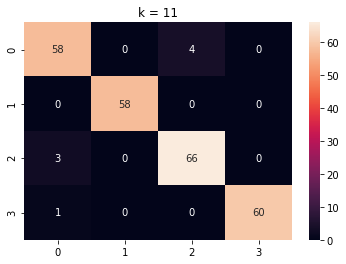

In [7]:
#plot confusion matrix
for i in range(len(cms)):
    plt.title("k = "+str(i+(i+1%2)))
    sns.heatmap(cms[i],annot=True,fmt="d")
    plt.show()

In [8]:
#accuracy for each value of k
K = {}
for i in range(len(accuracys)):
    K[ i+(i+1%2) ] = accuracys[i]
    print("k = {} \t | \t accuracy = {}".format(str(i+(i+1%2)),accuracys[i]))

k = 1 	 | 	 accuracy = 0.964
k = 3 	 | 	 accuracy = 0.984
k = 5 	 | 	 accuracy = 0.976
k = 7 	 | 	 accuracy = 0.968
k = 9 	 | 	 accuracy = 0.972
k = 11 	 | 	 accuracy = 0.968


#### Q2. Trace la precision de ce modele en fonction de k. quel valeur de k choisir pour ce problème?



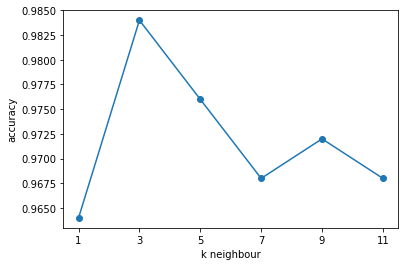

In [9]:
#plot accuracy
plt.plot(np.arange(1,13,2),np.array(accuracys),marker="o")
plt.xticks(np.arange(1, 13,2))
plt.xlabel('k neighbour')
plt.ylabel('accuracy')
plt.show()


In [10]:
def get_max_K(K):
    max_value = max(K.values())
    max_keys = [k for k, v in K.items() if v == max_value] 
    return max_keys[0]

print("la valeur optimale de k pour ce probleme est: ",get_max_K(K))

la valeur optimale de k pour ce probleme est:  3


la valeur optimale de k pour ce probleme est k = {{ get_max_K(K) }}